### Gather Data, Cache, And Verify It Is As Expected

```get_apidata```

contains code to download and cache (locally as a csv) data generated from the 

[`colorbrains-api`](https://github.com/jbs-public-function/colorbrains-api) output


In [53]:
from colorbrains_research import get_apidata
import matplotlib.pyplot as plt
import matplotlib.patches as patches



### basecolors
Matplotlib defines and names 8 base colors. 

```blue, green, red, cyan, magenta, yellow, black, white```

Matplotlib colors are generally r,g,b with an alpha component but also accepts hex. Worth researching whether the ```cmyk``` color schemes are respected or these colors are included for calibration purposes.
A couple of interesting points
- red is defined as (1,0,0) or (255, 0, 0)
- blue is defined as (0,0,1) or (0, 0, 255)
- green is defined as (0, 0.5, 0) or (0, 128, 0)

ie max channel value for pure red & pure blue but only half channel value for their pure green.

- cyan (0, 0.75, 0.75), magenta (0.75, 0, 0.75), yellow (0.75, 0.75, 0); three of the four components of a CMYK based color system are defined as 3/4 of max channel on two of three channels.

White & Black are almost always defined as (1,1,1) & (0,0,0) respectively and this data is no exception.
In terms of a RGB based color system these values represent an absolute bounding of a continous set.

These colors seem assigned somewhat arbitrarily. Red & Blue assigned by definition. Green set to 1/2 input. Cyan, Magenta & Yellow are 3/4 max input value as a combination of 3 choose 2 from {r,g,b}


In [54]:
display(get_apidata.get_basecolors().shape)
display(get_apidata.get_basecolors())

(8, 4)

,color_name,red,green,blue
0,b,0.00,0.00,1.00
1,g,0.00,0.50,0.00
2,r,1.00,0.00,0.00
3,c,0.00,0.75,0.75
4,m,0.75,0.00,0.75
5,y,0.75,0.75,0.00
6,k,0.00,0.00,0.00
7,w,1.00,1.00,1.00


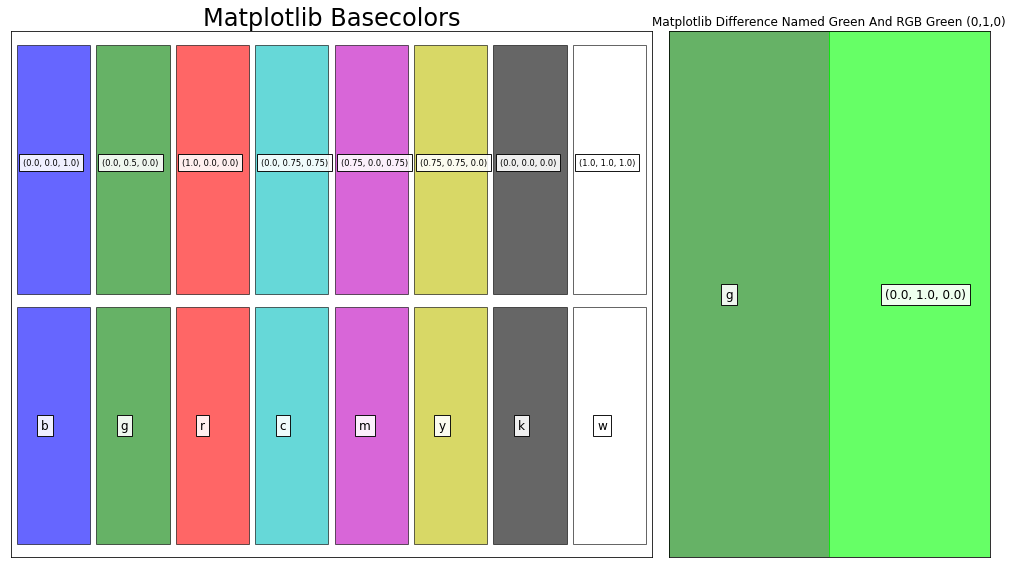

In [55]:
colors = []
labels = []
for i, v in get_apidata.get_basecolors().iterrows():
    labels.append(v['color_name'])
    colors.append((v['red'], v['green'], v['blue']))

fig, (ax, ax_greens) = plt.subplots(figsize=(14,8), ncols=2, gridspec_kw={'width_ratios': [3 ,1.5]})
offset = .25
width = 3

max_y = 0.9
min_y = .05

annotate_y = 0.5
annotate_x = 0.25

for count, (label, color) in enumerate(zip(colors, labels)):
    start = width * count
    _offset = offset * (count + 1)
    rect = patches.Rectangle((start+_offset, min_y), width, max_y, linewidth=1, edgecolor='k', facecolor=color, alpha=0.6)
    ax.add_patch(rect)

    rect = patches.Rectangle((start+_offset, min_y + .95), width, max_y + 0.05, linewidth=1, edgecolor='k', facecolor=color, alpha=0.6)
    ax.add_patch(rect)

    g = ax.annotate(color, (start + _offset + offset * 4, annotate_y), size='large', va='center')
    g.set_bbox(dict(facecolor='white', alpha=0.9,))
    g = ax.annotate(label, (start + _offset + offset, annotate_y + 1), size='small', va='center')
    g.set_bbox(dict(facecolor='white', alpha=0.9,))

rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='g', facecolor='g', alpha=0.6)
ax_greens.add_patch(rect)
rect = patches.Rectangle((1, 0), 1, 1, linewidth=1, edgecolor=(0,1,0), facecolor=(0,1,0), alpha=0.6)
ax_greens.add_patch(rect)


g = ax_greens.annotate('g', (0.35, 0.5), size='large', va='center')
g.set_bbox(dict(facecolor='white', alpha=0.9,))
g = ax_greens.annotate('(0.0, 1.0, 0.0)', (1.35, 0.5), size='large', va='center')
g.set_bbox(dict(facecolor='white', alpha=0.9,))


ax_greens.set_xlim(0, 2)
ax_greens.set_ylim(0,1)
ax_greens.axes.get_xaxis().set_visible(False)
ax_greens.axes.get_yaxis().set_visible(False)
ax_greens.set_title('Matplotlib Difference Named Green And RGB Green (0,1,0)')


ax.set_xlim(0, (len(labels) + 0.75) * width)
ax.set_ylim(0,2)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_title('Matplotlib Basecolors', size=24)
plt.tight_layout()

Defining green in this fashion provides for a more visually similar experience to the remaining colors in this set. My initial opinion is that oure green seems dominating. Perhaps the c,m,y set could help explain this. 

Questions
- Why does the muted green feel less vibrant than the (what I perceive) to be the brigter green?
- - Is there a way to model what makes a baseline or not?
- - Why not max out c, m, y



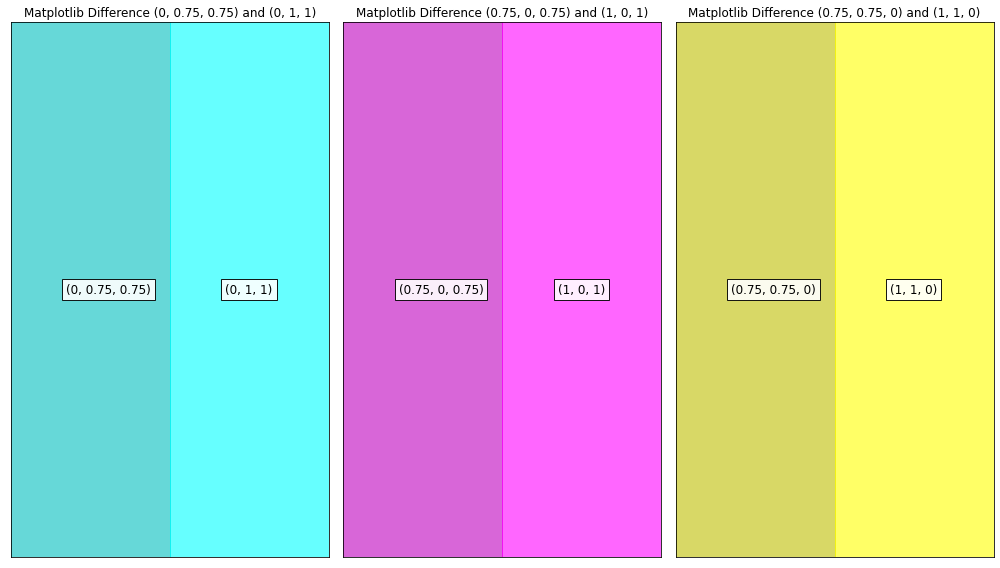

In [56]:

fig, (ax_c, ax_m, ax_y) = plt.subplots(figsize=(14,8), ncols=3, gridspec_kw={'width_ratios': [1 ,1, 1]})

c1, c2 = (0, 0.75, 0.75), (0, 1, 1) 
rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor=c1, facecolor=c1, alpha=0.6)
ax_c.add_patch(rect)
rect = patches.Rectangle((1, 0), 1, 1, linewidth=1, edgecolor=c2, facecolor=c2, alpha=0.6)
ax_c.add_patch(rect)


g = ax_c.annotate(f'{c1}', (0.35, 0.5), size='large', va='center')
g.set_bbox(dict(facecolor='white', alpha=0.9,))
g = ax_c.annotate(f'{c2}', (1.35, 0.5), size='large', va='center')
g.set_bbox(dict(facecolor='white', alpha=0.9,))


ax_c.set_xlim(0, 2)
ax_c.set_ylim(0,1)
ax_c.axes.get_xaxis().set_visible(False)
ax_c.axes.get_yaxis().set_visible(False)
ax_c.set_title('Matplotlib Difference (0, 0.75, 0.75) and (0, 1, 1)')


c1, c2 = (0.75, 0, 0.75), (1, 0, 1) 
rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor=c1, facecolor=c1, alpha=0.6)
ax_m.add_patch(rect)
rect = patches.Rectangle((1, 0), 1, 1, linewidth=1, edgecolor=c2, facecolor=c2, alpha=0.6)
ax_m.add_patch(rect)


g = ax_m.annotate(f'{c1}', (0.35, 0.5), size='large', va='center')
g.set_bbox(dict(facecolor='white', alpha=0.9,))
g = ax_m.annotate(f'{c2}', (1.35, 0.5), size='large', va='center')
g.set_bbox(dict(facecolor='white', alpha=0.9,))


ax_m.set_xlim(0, 2)
ax_m.set_ylim(0,1)
ax_m.axes.get_xaxis().set_visible(False)
ax_m.axes.get_yaxis().set_visible(False)
ax_m.set_title('Matplotlib Difference (0.75, 0, 0.75) and (1, 0, 1)')


c1, c2 = (0.75, 0.75, 0), (1, 1, 0) 
rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor=c1, facecolor=c1, alpha=0.6)
ax_y.add_patch(rect)
rect = patches.Rectangle((1, 0), 1, 1, linewidth=1, edgecolor=c2, facecolor=c2, alpha=0.6)
ax_y.add_patch(rect)


g = ax_y.annotate(f'{c1}', (0.35, 0.5), size='large', va='center')
g.set_bbox(dict(facecolor='white', alpha=0.9,))
g = ax_y.annotate(f'{c2}', (1.35, 0.5), size='large', va='center')
g.set_bbox(dict(facecolor='white', alpha=0.9,))


ax_y.set_xlim(0, 2)
ax_y.set_ylim(0,1)
ax_y.axes.get_xaxis().set_visible(False)
ax_y.axes.get_yaxis().set_visible(False)
ax_y.set_title('Matplotlib Difference (0.75, 0.75, 0) and (1, 1, 0)')


plt.tight_layout()

I think Cyan is Aqua at full channel power. Likely Magenta is prenamed as is full channel yellow.
* Further down this notebook this is more or less confirmed. Interestingly, of the named matplotlib colors, `cyan` and `aqua` are both defined as full channel (0, 1, 1) which means that a version of `cyan` and `c` (I assume) are provided
* similarly, `fuscia` and `magenta` are defined as full channel (1, 0, 1), and `m` being an alternate definition
* (1, 1, 0) is singularly defined as yellow.

There are redundancies abound. I wonder if this is intentional or an artifact of relying on string inputs.

### Matplotlib Categorized Colormaps
Matplotlib has pregenerated colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html <br>
With the exception of `Qualitative`, color sets designed to be as differentiating as possible, these sets are all intended for continous variables.<br>


Each colormap has a predefined number of steps where data at the 0 or n ends of the curve have the most extreme colors within the set.<br>
Qualitative data is designed for data with an aribitrary binning of data. Useful for categorical data. Designed to be as differentiating as possible.<br>

`Cyclic` colormaps are used where there is some periodicity in the data (`sin`, `cosine`, etc)

`Diverging` has three colors representing a divergence and direction from a specified midpoint. Colors gradient from a middle color towards a pole with a unique color.
- temperature data
- rainfall
- velocity

In [57]:
print(get_apidata.get_categorized_colormaps().shape)
cat_cmapdf = get_apidata.get_categorized_colormaps()
display(cat_cmapdf)

(83, 3)


,categorical_name,colormap_name,cmap_n_total
0,PerceptuallyUniformSequential,viridis,256
1,PerceptuallyUniformSequential,plasma,256
2,PerceptuallyUniformSequential,inferno,256
3,PerceptuallyUniformSequential,magma,256
4,PerceptuallyUniformSequential,cividis,256
...,...,...,...
78,Miscellaneous,rainbow,256
79,Miscellaneous,jet,256
80,Miscellaneous,turbo,256
81,Miscellaneous,nipy_spectral,256


In [58]:
cat_cmapdf.groupby(['categorical_name'])['cmap_n_total'].describe()

,count,mean,std,min,25%,50%,75%,max
categorical_name,,,,,,,,
Cyclic,3.0,425.333333,146.646968,256.0,383.0,510.0,510.0,510.0
Diverging,12.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Miscellaneous,17.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
PerceptuallyUniformSequential,5.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Qualitative,12.0,12.000000,5.027199,8.0,8.0,9.5,14.0,20.0
Sequential,18.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
SequentialTwo,16.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0


In [59]:
print(get_apidata.get_colormaps().shape)
get_apidata.get_colormaps().head()

(18828, 5)


,colormap_name,cmap_n_observation,red,green,blue
0,viridis,1,0.267004,0.004874,0.329415
1,viridis,2,0.268510,0.009605,0.335427
2,viridis,3,0.269944,0.014625,0.341379
3,viridis,4,0.271305,0.019942,0.347269
4,viridis,5,0.272594,0.025563,0.353093


### Named Colors
Matplotlib provides another set of named colors. This set seems to be standard javascript color definitions and there are 9 redundant named colors out of a set of 148

In [60]:
print(get_apidata.get_namedcolors().shape)
get_apidata.get_namedcolors().head()

(148, 4)


,color_name,red,green,blue
0,aliceblue,0.941176,0.972549,1.000000
1,antiquewhite,0.980392,0.921569,0.843137
2,aqua,0.000000,1.000000,1.000000
3,aquamarine,0.498039,1.000000,0.831373
4,azure,0.941176,1.000000,1.000000


In [61]:
get_apidata.get_namedcolors().drop_duplicates(subset=['red', 'green', 'blue'])

,color_name,red,green,blue
0,aliceblue,0.941176,0.972549,1.000000
1,antiquewhite,0.980392,0.921569,0.843137
2,aqua,0.000000,1.000000,1.000000
3,aquamarine,0.498039,1.000000,0.831373
4,azure,0.941176,1.000000,1.000000
...,...,...,...,...
143,wheat,0.960784,0.870588,0.701961
144,white,1.000000,1.000000,1.000000
145,whitesmoke,0.960784,0.960784,0.960784
146,yellow,1.000000,1.000000,0.000000


In [62]:
named_df = get_apidata.get_namedcolors()
r,g,b = 1,1,1
named_df[(named_df['red'] == 0) & (named_df['green'] == g) & (named_df['blue'] == b)]

,color_name,red,green,blue
2,aqua,0.0,1.0,1.0
20,cyan,0.0,1.0,1.0


In [63]:
named_df[(named_df['red'] == r) & (named_df['green'] == 0) & (named_df['blue'] == b)]

,color_name,red,green,blue
48,fuchsia,1.0,0.0,1.0
85,magenta,1.0,0.0,1.0


In [64]:
named_df[(named_df['red'] == r) & (named_df['green'] == g) & (named_df['blue'] == 0)]

,color_name,red,green,blue
146,yellow,1.0,1.0,0.0
